In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline


In [2]:
digits = load_digits()

X = digits.data      # (1797, 64)
y = digits.target   # (1797,)

print("Dataset loaded successfully")
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Dataset loaded successfully
Feature shape: (1797, 64)
Target shape: (1797,)


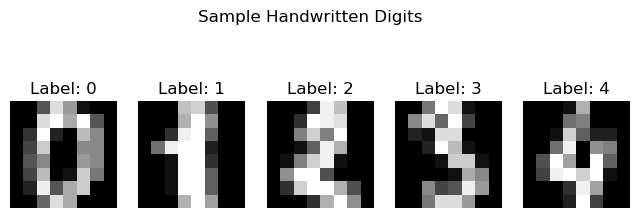

In [3]:
plt.figure(figsize=(8, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.suptitle("Sample Handwritten Digits")
plt.show()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1437
Testing samples: 360


In [5]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with K=3:", accuracy)


Accuracy with K=3: 0.9666666666666667


In [7]:
k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K = {k} → Accuracy = {acc:.4f}")


K = 3 → Accuracy = 0.9667
K = 5 → Accuracy = 0.9639
K = 7 → Accuracy = 0.9667
K = 9 → Accuracy = 0.9639


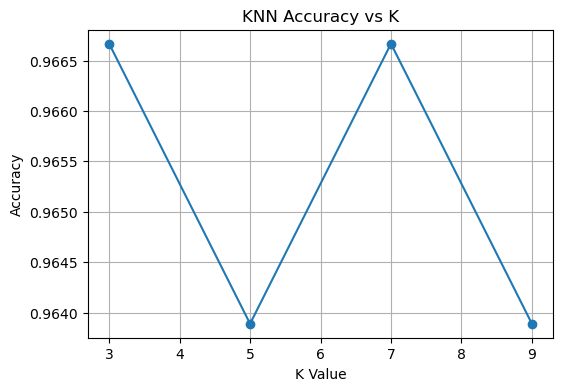

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.show()


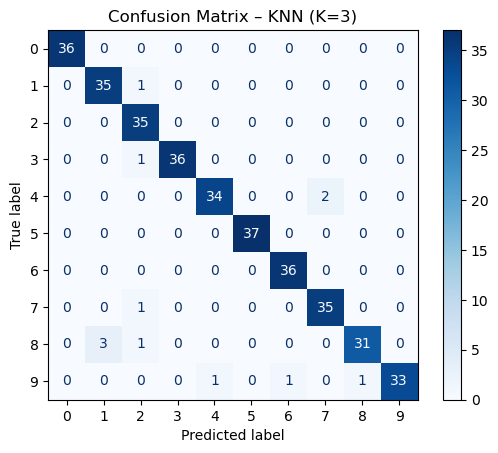

In [9]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=digits.target_names
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix – KNN (K=3)")
plt.show()


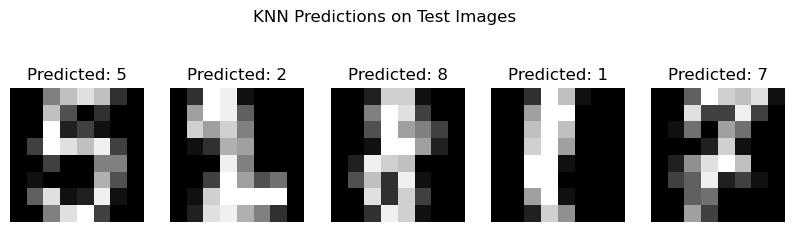

In [10]:
plt.figure(figsize=(10, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')

plt.suptitle("KNN Predictions on Test Images")
plt.show()


In [11]:
print("KNN Handwritten Digit Classification completed successfully.")


KNN Handwritten Digit Classification completed successfully.
